# King County housing dataset
We'll predict prices of houses in King County WA using both shallow and deep learning
models

Importing libraries and reading the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
housing_df = pd.read_csv('data/king_county_houses/kc_house_data.csv')
housing_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
housing_df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Id column looks unneeded and so does the date - it includes only 2 years; it's difficult
to get any pattern from it

In [4]:
housing_df.drop(columns=['id', 'date'], inplace=True)
housing_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
len(housing_df['zipcode'].unique())

70

There is a lot of zipcodes, and the geographical characteristics are
already covered by latitude and longitude, so we can easily drop the
zipcode column

In [6]:
housing_df.drop(columns=['zipcode'], inplace=True)

We can see that some features should be treated as categorical and year features should
represent number of years since their event, not a year per se

In [7]:
housing_df['yrs_since_built'] = 2015 - housing_df['yr_built']
housing_df['yr_renovated'].replace(to_replace=0, value=2015, inplace=True)
housing_df['yrs_since_renovated'] = 2015 - housing_df['yr_renovated']
housing_df.drop(columns=['yr_built', 'yr_renovated'], inplace=True)
housing_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,yrs_since_built,yrs_since_renovated
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,47.560053,-122.213896,1986.552492,12768.455652,43.994864,0.810808
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,0.138564,0.140828,685.391304,27304.179631,29.373411,5.006055
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,47.155900,-122.519000,399.000000,651.000000,0.000000,0.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000,18.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000,40.000000,0.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,47.678000,-122.125000,2360.000000,10083.000000,64.000000,0.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,47.777600,-121.315000,6210.000000,871200.000000,115.000000,81.000000


Let's display how the houses look like on the map

<AxesSubplot:xlabel='long', ylabel='lat'>

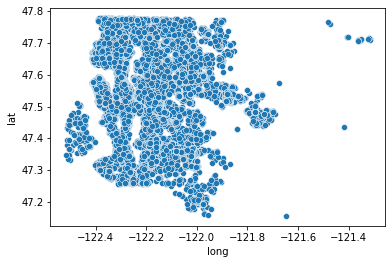

In [8]:
sns.scatterplot(x='long', y='lat', data=housing_df)

And how they look like in other contexts

<AxesSubplot:xlabel='price', ylabel='Count'>

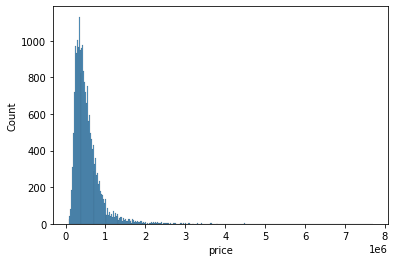

In [9]:
sns.histplot(x='price', data=housing_df)

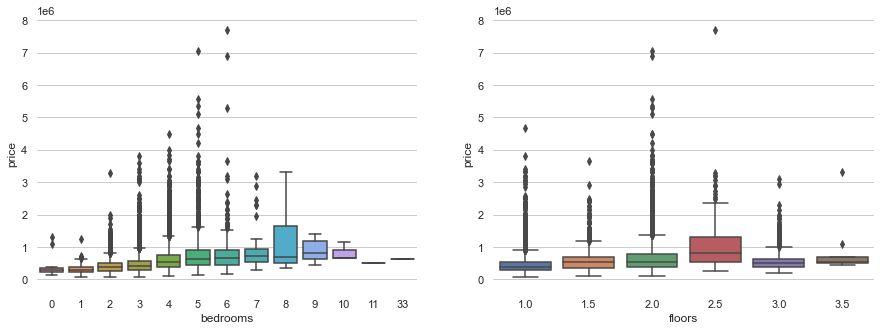

In [10]:
sns.set(style="whitegrid", font_scale=1)

fig, ax = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=housing_df['bedrooms'],y=housing_df['price'], ax=ax[0])
sns.boxplot(x=housing_df['floors'],y=housing_df['price'], ax=ax[1])
sns.despine(bottom=True, left=True)

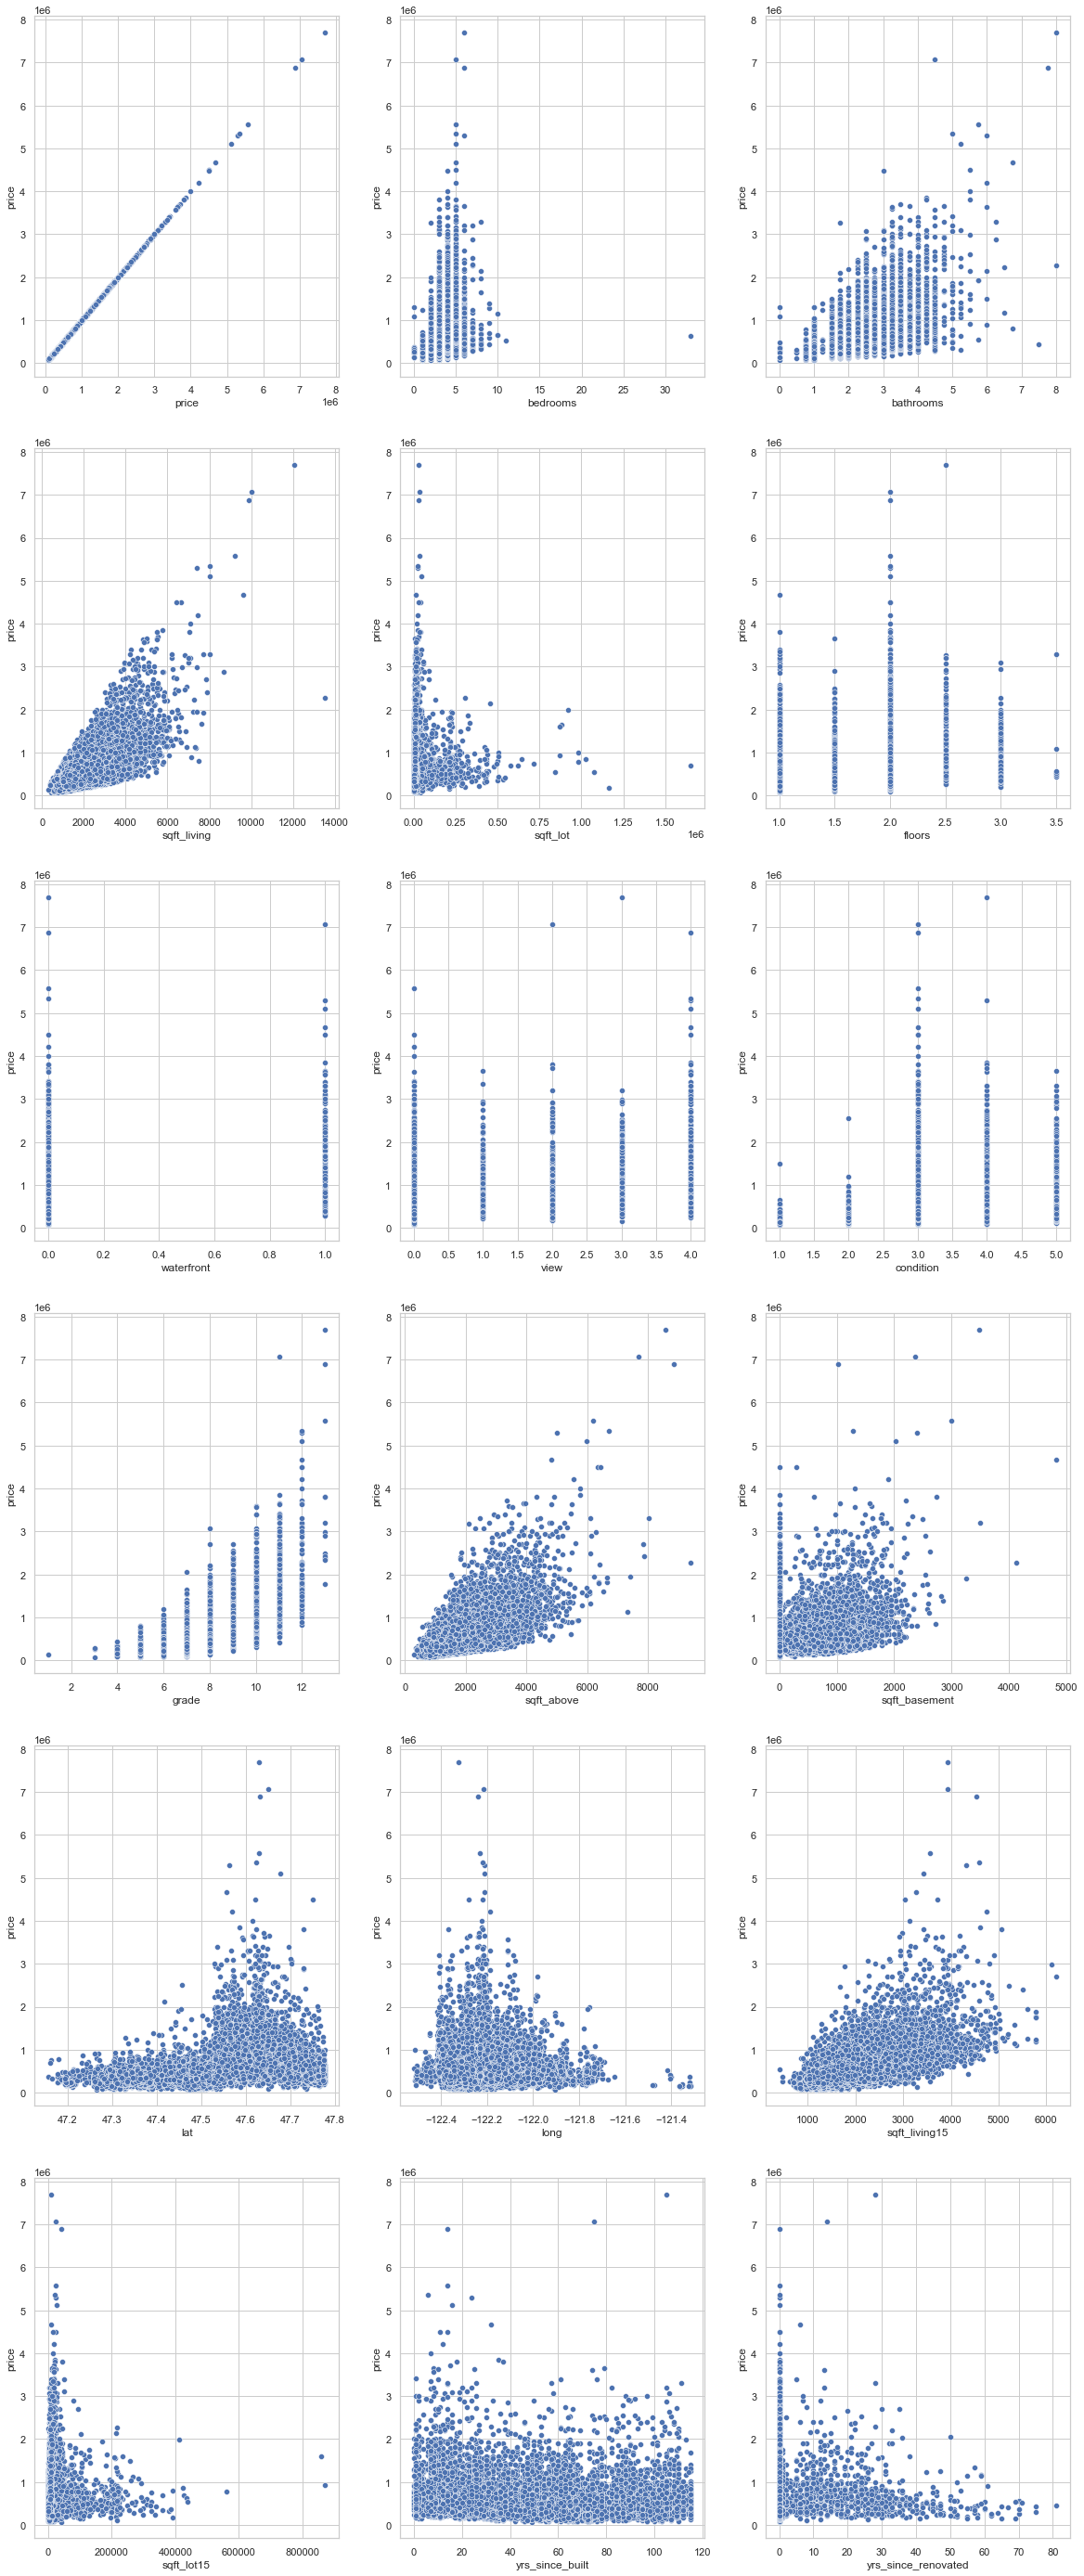

In [11]:
_, ax = plt.subplots(6, 3, figsize=(20,50))

for i, feature in enumerate(housing_df.columns):
    sns.scatterplot(x=feature, y='price', data=housing_df, palette='bright', ax=ax[i // 3][i % 3])

We can see that the data is not normally distributed, which can be an interesting case
study - do we need to transform it or not

Let's see correlations in our data

<AxesSubplot:>

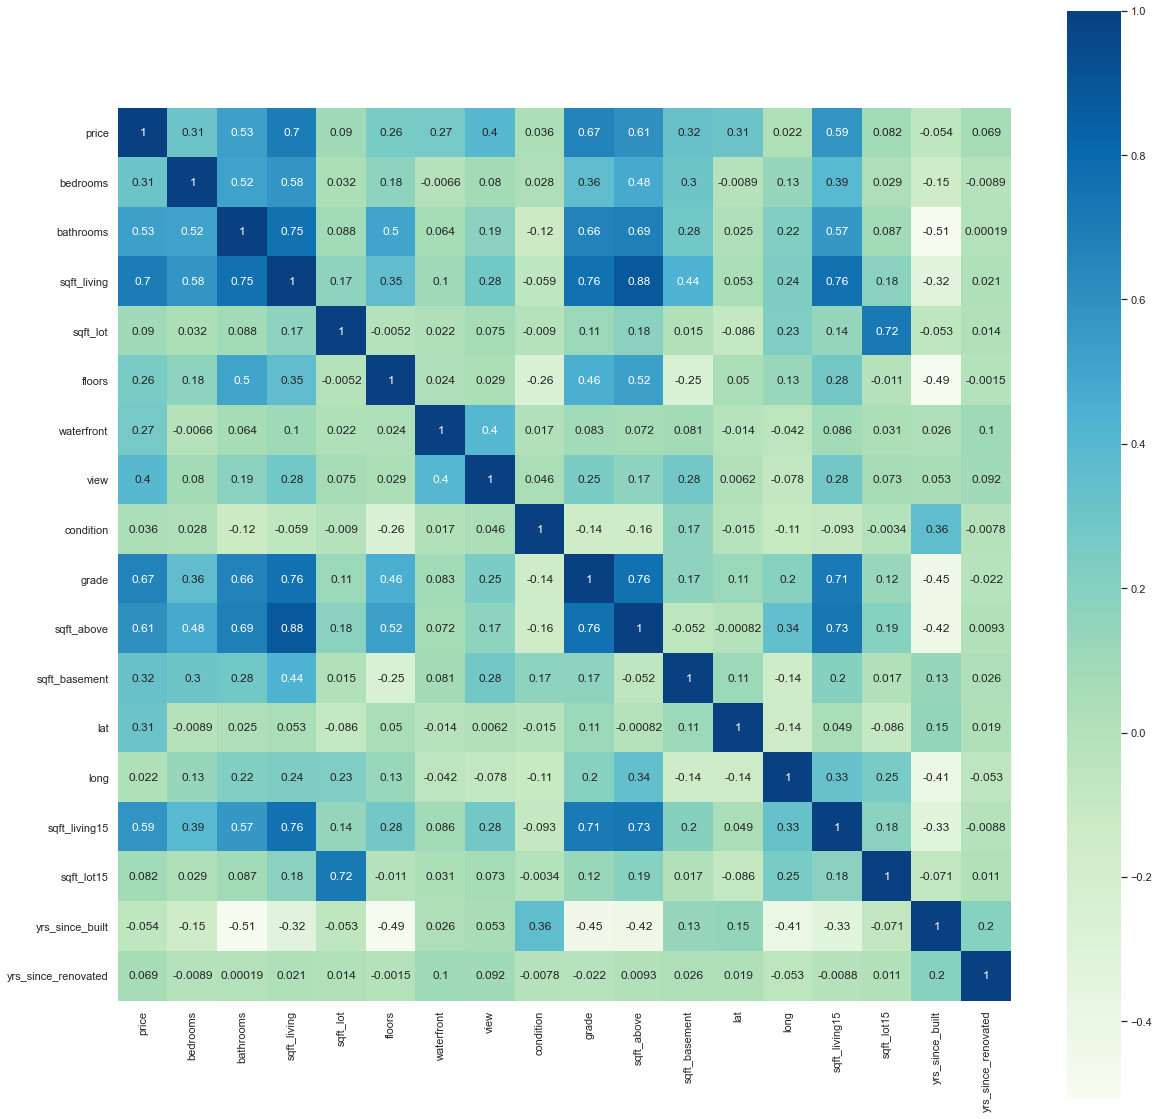

In [12]:
corr_matrix = housing_df.corr()
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True, cmap="GnBu", linecolor='w', square=True)

In [13]:
abs_corr_matrix = corr_matrix.abs()
upper = abs_corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]
housing_df.drop(to_drop, axis=1, inplace=True)

<AxesSubplot:>

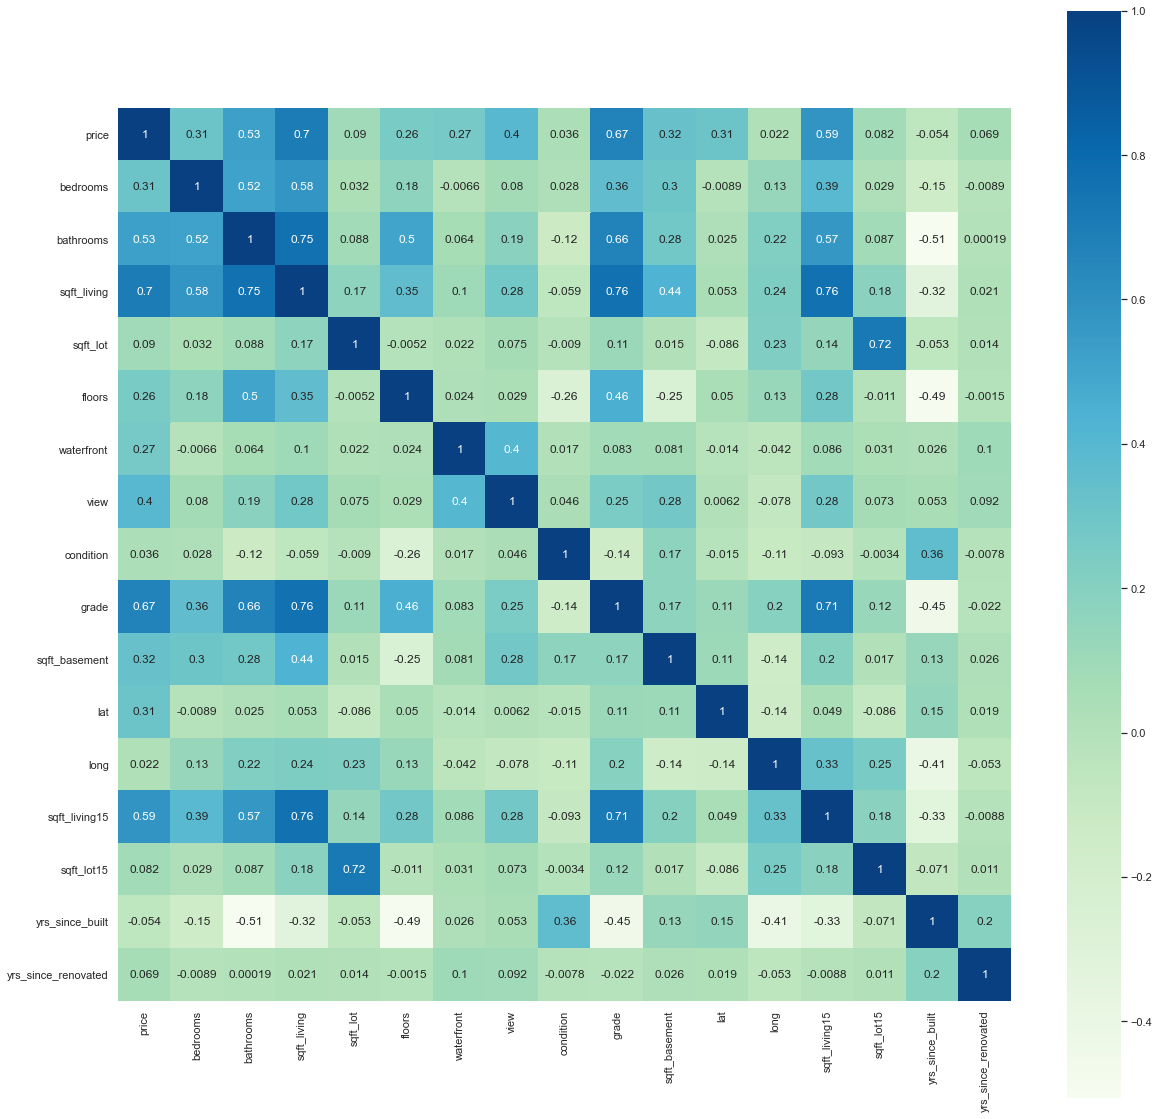

In [14]:
plt.subplots(figsize=(20,20))
corr_matrix = housing_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="GnBu", linecolor='w', square=True)

In [15]:
price_corr = corr_matrix['price'].sort_values(ascending=False)
price_corr

price                  1.000000
sqft_living            0.702035
grade                  0.667434
sqft_living15          0.585379
bathrooms              0.525138
view                   0.397293
sqft_basement          0.323816
bedrooms               0.308350
lat                    0.307003
waterfront             0.266369
floors                 0.256794
sqft_lot               0.089661
sqft_lot15             0.082447
yrs_since_renovated    0.069467
condition              0.036362
long                   0.021626
yrs_since_built       -0.054012
Name: price, dtype: float64

Now I think we can go to actual machine learning tasks

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [17]:
X = housing_df.drop(columns=['price'])
y = housing_df.loc[:,'price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [18]:
std_scaler = StandardScaler()
X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.transform(X_test)

In [19]:
forest_param_grid = [{'n_estimators': [140, 160, 180], 'max_depth': [9,11,13]}]
forest_grid = GridSearchCV(RandomForestRegressor(n_jobs=3), param_grid=forest_param_grid, cv=5,
                           scoring='r2')
forest_grid.fit(X_train, y_train)
forest_grid.score(X_test, y_test)

0.8486339970504396

In [33]:
forest_pred = forest_grid.predict(X_test)
forest_pred_list = list(forest_pred)
y_test_list = list(y_test)

compare_prices_forest = pd.DataFrame({'Predicted price': forest_pred_list, 'Actual price': y_test_list})
compare_prices_forest.head(10)

,Predicted price,Actual price
0,3.794123e+05,365000.0
1,8.661739e+05,865000.0
2,1.088484e+06,1038000.0
3,2.070715e+06,1490000.0
4,6.994079e+05,711000.0
5,2.466050e+05,211000.0
6,8.049077e+05,790000.0
7,6.241623e+05,680000.0
8,4.087774e+05,384500.0
9,5.399927e+05,605000.0


In [20]:
forest_grid.best_params_

{'max_depth': 13, 'n_estimators': 180}

In [21]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
np.mean(cross_val_score(lin_reg, X_test, y_test, cv=5))

0.6906946669380227

In [22]:
gb_param_grid = [{'n_estimators': [140, 160, 180], 'max_depth': [5, 7, 9]}]
gb_grid = GridSearchCV(GradientBoostingRegressor(), param_grid=gb_param_grid, cv=5,
                       scoring='r2')
gb_grid.fit(X_train, y_train)
gb_grid.score(X_test, y_test)

0.8687429648068244

In [34]:
gb_pred = forest_grid.predict(X_test)
gb_pred_list = list(gb_pred)

compare_prices = pd.DataFrame({'Predicted price': gb_pred_list, 'Actual price': y_test_list})
compare_prices.head(10)

,Predicted price,Actual price
0,3.794123e+05,365000.0
1,8.661739e+05,865000.0
2,1.088484e+06,1038000.0
3,2.070715e+06,1490000.0
4,6.994079e+05,711000.0
5,2.466050e+05,211000.0
6,8.049077e+05,790000.0
7,6.241623e+05,680000.0
8,4.087774e+05,384500.0
9,5.399927e+05,605000.0


In [23]:
gb_grid.best_params_

{'max_depth': 7, 'n_estimators': 180}

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [25]:
model = Sequential()

model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mae', metrics=['mse'])

In [26]:
model.fit(X_train, y_train, batch_size=32, epochs=100,
          callbacks=EarlyStopping(min_delta=10, patience=5, monitor='loss'))

Epoch 1/100
473/473 [==============================] - 6s 6ms/step - loss: 535086.8428 - mse: 423899380308.2532

In [27]:
model.evaluate(X_test, y_test)

203/203 [==============================] - 1s 4ms/step - loss: 105230.7031 - mse: 36877660160.0000

[105230.703125, 36877660160.0]

In [28]:
y_pred = model.predict(X_test)
y_pred

array([[ 400114.75],
       [ 758832.3 ],
       [1195046.9 ],
       ...,
       [ 375294.78],
       [ 840204.8 ],
       [ 629440.2 ]], dtype=float32)

In [32]:
y_pred_list = list(y_pred)

compare_prices = pd.DataFrame({'Predicted price': y_pred_list, 'Actual price': y_test_list})
compare_prices.head(10)

,Predicted price,Actual price
0,[400114.75],365000.0
1,[758832.3],865000.0
2,[1195046.9],1038000.0
3,[1720707.1],1490000.0
4,[692384.2],711000.0
5,[256184.44],211000.0
6,[728426.3],790000.0
7,[486265.4],680000.0
8,[404832.84],384500.0
9,[539102.56],605000.0
